<a href="https://colab.research.google.com/github/ehsan94/Deep-Learning/blob/master/Deutschland_COVID19_SHAP_0to75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total: 75-91

In [1]:
%pip install shap
%matplotlib inline
%pip install catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import shap

from catboost import Pool, CatBoostRegressor

# Data

In [3]:
df = pd.read_stata('W:\COVID19\std_inz75_91.dta')


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.


In [4]:
df.head()

,D_v404,D_v405,D_v406,D_v423,D_v424,D_v425,D_v442,D_Abhaen,D_Auslae,D_v483,...,G_Pendler_Potsdam,G_latitude,G_longitude,G_distance_Ischgl,Flag100_Pendler_Coesfeld,Flag100_Pendler_Rosenheim,Flag100_Pendler_Goettingen,std_inz_0to75,std_inz_75to91,eastwest
0,46.000000,12.4,-2.5,0.93,2.4,12.3,1.04,38.299999,9.1,3.2,...,0.0,50.549999,7.116667,457.259216,0.0,0.0,0.0,7.929436,51.103943,1.0
1,43.000000,16.0,-3.5,0.94,4.2,7.6,1.00,29.900000,8.0,2.9,...,0.0,48.466667,11.133333,173.721573,0.0,0.0,0.0,4.718663,97.875450,1.0
2,42.500000,14.9,-2.3,0.88,4.0,6.3,0.98,28.900000,12.6,4.0,...,0.0,48.400002,9.983334,156.045456,0.0,0.0,0.0,8.526311,125.029121,1.0
3,49.700001,-1.4,-7.5,0.88,-4.3,-13.3,1.04,50.799999,3.2,2.0,...,0.0,50.983334,12.433333,468.846863,0.0,0.0,0.0,1.614463,23.919840,0.0
4,44.700001,9.4,-1.5,0.93,-0.3,-7.4,1.02,34.099998,7.2,2.1,...,0.0,50.683334,7.650000,451.906799,0.0,0.0,0.0,5.352468,38.366455,1.0


In [5]:
Y = df['std_inz_75to91']
X = df.loc[:, ~df.columns.isin(['std_inz_75to91', 'eastwest'])]

# RF model

In [6]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
rf=rfr.fit(X, Y)  

# R2 RF model

In [7]:
rf.score(X, Y)

0.9242461926610275

# CatBoost Model

In [8]:
# initialize Pool
train_pool = Pool(X,Y)
 

# specify the training parameters 
model = CatBoostRegressor(random_seed=0)
#train the model
cb = model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(train_pool)
#print(preds)

Learning rate set to 0.033171
0:	learn: 63.2684553	total: 150ms	remaining: 2m 29s
1:	learn: 62.6426577	total: 156ms	remaining: 1m 17s
2:	learn: 61.9593927	total: 163ms	remaining: 54.1s
3:	learn: 61.2708207	total: 170ms	remaining: 42.3s
4:	learn: 60.6642890	total: 177ms	remaining: 35.2s
5:	learn: 60.0517520	total: 184ms	remaining: 30.4s
6:	learn: 59.4655317	total: 190ms	remaining: 27s
7:	learn: 58.9360813	total: 197ms	remaining: 24.4s
8:	learn: 58.3202296	total: 203ms	remaining: 22.4s
9:	learn: 57.6616642	total: 209ms	remaining: 20.7s
10:	learn: 57.0959355	total: 216ms	remaining: 19.4s
11:	learn: 56.5393118	total: 223ms	remaining: 18.4s
12:	learn: 55.9304121	total: 230ms	remaining: 17.4s
13:	learn: 55.4449472	total: 236ms	remaining: 16.6s
14:	learn: 55.0106435	total: 243ms	remaining: 15.9s
15:	learn: 54.5177893	total: 250ms	remaining: 15.4s
16:	learn: 53.9654260	total: 257ms	remaining: 14.9s
17:	learn: 53.5285107	total: 264ms	remaining: 14.4s
18:	learn: 53.1062910	total: 272ms	remaining

165:	learn: 24.7536162	total: 1.26s	remaining: 6.31s
166:	learn: 24.6578639	total: 1.26s	remaining: 6.3s
167:	learn: 24.5675237	total: 1.27s	remaining: 6.29s
168:	learn: 24.4229906	total: 1.28s	remaining: 6.28s
169:	learn: 24.2983111	total: 1.28s	remaining: 6.27s
170:	learn: 24.2217119	total: 1.29s	remaining: 6.26s
171:	learn: 24.1770198	total: 1.3s	remaining: 6.24s
172:	learn: 24.0486161	total: 1.3s	remaining: 6.23s
173:	learn: 23.9689505	total: 1.31s	remaining: 6.22s
174:	learn: 23.9317391	total: 1.32s	remaining: 6.21s
175:	learn: 23.8304470	total: 1.32s	remaining: 6.2s
176:	learn: 23.7850384	total: 1.33s	remaining: 6.18s
177:	learn: 23.6889908	total: 1.34s	remaining: 6.17s
178:	learn: 23.6328290	total: 1.34s	remaining: 6.16s
179:	learn: 23.5577640	total: 1.35s	remaining: 6.15s
180:	learn: 23.4499648	total: 1.36s	remaining: 6.14s
181:	learn: 23.3933451	total: 1.36s	remaining: 6.12s
182:	learn: 23.3202041	total: 1.37s	remaining: 6.11s
183:	learn: 23.1799897	total: 1.38s	remaining: 6.1

324:	learn: 13.7258787	total: 2.33s	remaining: 4.85s
325:	learn: 13.6426307	total: 2.34s	remaining: 4.84s
326:	learn: 13.5835570	total: 2.35s	remaining: 4.83s
327:	learn: 13.5713299	total: 2.35s	remaining: 4.83s
328:	learn: 13.4905902	total: 2.36s	remaining: 4.82s
329:	learn: 13.4215439	total: 2.37s	remaining: 4.81s
330:	learn: 13.3780756	total: 2.38s	remaining: 4.8s
331:	learn: 13.3294679	total: 2.38s	remaining: 4.79s
332:	learn: 13.2655391	total: 2.39s	remaining: 4.79s
333:	learn: 13.2322601	total: 2.4s	remaining: 4.78s
334:	learn: 13.1632174	total: 2.4s	remaining: 4.78s
335:	learn: 13.1495675	total: 2.41s	remaining: 4.77s
336:	learn: 13.0750251	total: 2.42s	remaining: 4.76s
337:	learn: 13.0589182	total: 2.43s	remaining: 4.75s
338:	learn: 13.0326005	total: 2.43s	remaining: 4.75s
339:	learn: 12.9824663	total: 2.44s	remaining: 4.74s
340:	learn: 12.9180003	total: 2.45s	remaining: 4.73s
341:	learn: 12.8685626	total: 2.46s	remaining: 4.72s
342:	learn: 12.8359231	total: 2.46s	remaining: 4.

505:	learn: 7.2393576	total: 3.59s	remaining: 3.5s
506:	learn: 7.2018052	total: 3.6s	remaining: 3.5s
507:	learn: 7.1976920	total: 3.6s	remaining: 3.49s
508:	learn: 7.1671970	total: 3.61s	remaining: 3.48s
509:	learn: 7.1480511	total: 3.62s	remaining: 3.47s
510:	learn: 7.1316847	total: 3.62s	remaining: 3.47s
511:	learn: 7.1071358	total: 3.63s	remaining: 3.46s
512:	learn: 7.0791001	total: 3.64s	remaining: 3.45s
513:	learn: 7.0369031	total: 3.64s	remaining: 3.44s
514:	learn: 7.0232369	total: 3.65s	remaining: 3.44s
515:	learn: 6.9956919	total: 3.66s	remaining: 3.43s
516:	learn: 6.9780849	total: 3.66s	remaining: 3.42s
517:	learn: 6.9486530	total: 3.67s	remaining: 3.42s
518:	learn: 6.9207772	total: 3.68s	remaining: 3.41s
519:	learn: 6.8978499	total: 3.68s	remaining: 3.4s
520:	learn: 6.8603742	total: 3.69s	remaining: 3.39s
521:	learn: 6.8472628	total: 3.7s	remaining: 3.39s
522:	learn: 6.8222748	total: 3.71s	remaining: 3.38s
523:	learn: 6.8016006	total: 3.71s	remaining: 3.37s
524:	learn: 6.7792

688:	learn: 4.0782060	total: 4.84s	remaining: 2.18s
689:	learn: 4.0594846	total: 4.84s	remaining: 2.18s
690:	learn: 4.0567732	total: 4.85s	remaining: 2.17s
691:	learn: 4.0513407	total: 4.86s	remaining: 2.16s
692:	learn: 4.0493427	total: 4.86s	remaining: 2.15s
693:	learn: 4.0476465	total: 4.87s	remaining: 2.15s
694:	learn: 4.0315950	total: 4.88s	remaining: 2.14s
695:	learn: 4.0227144	total: 4.88s	remaining: 2.13s
696:	learn: 4.0029126	total: 4.89s	remaining: 2.13s
697:	learn: 3.9964040	total: 4.89s	remaining: 2.12s
698:	learn: 3.9821823	total: 4.9s	remaining: 2.11s
699:	learn: 3.9804982	total: 4.91s	remaining: 2.1s
700:	learn: 3.9744807	total: 4.92s	remaining: 2.1s
701:	learn: 3.9543668	total: 4.92s	remaining: 2.09s
702:	learn: 3.9522746	total: 4.93s	remaining: 2.08s
703:	learn: 3.9490111	total: 4.93s	remaining: 2.07s
704:	learn: 3.9330263	total: 4.94s	remaining: 2.07s
705:	learn: 3.9152492	total: 4.95s	remaining: 2.06s
706:	learn: 3.8969252	total: 4.95s	remaining: 2.05s
707:	learn: 3.8

865:	learn: 2.3944431	total: 6.09s	remaining: 943ms
866:	learn: 2.3803455	total: 6.1s	remaining: 936ms
867:	learn: 2.3794237	total: 6.11s	remaining: 929ms
868:	learn: 2.3708619	total: 6.11s	remaining: 922ms
869:	learn: 2.3562216	total: 6.12s	remaining: 915ms
870:	learn: 2.3512634	total: 6.13s	remaining: 907ms
871:	learn: 2.3431449	total: 6.13s	remaining: 901ms
872:	learn: 2.3329264	total: 6.16s	remaining: 896ms
873:	learn: 2.3241937	total: 6.16s	remaining: 889ms
874:	learn: 2.3212361	total: 6.17s	remaining: 882ms
875:	learn: 2.3115728	total: 6.18s	remaining: 875ms
876:	learn: 2.2988032	total: 6.18s	remaining: 867ms
877:	learn: 2.2977350	total: 6.19s	remaining: 861ms
878:	learn: 2.2955887	total: 6.2s	remaining: 853ms
879:	learn: 2.2869531	total: 6.21s	remaining: 846ms
880:	learn: 2.2800093	total: 6.21s	remaining: 839ms
881:	learn: 2.2712034	total: 6.22s	remaining: 832ms
882:	learn: 2.2695169	total: 6.23s	remaining: 825ms
883:	learn: 2.2597120	total: 6.24s	remaining: 818ms
884:	learn: 2.

# R2 CatBoost

In [9]:
cb.score(X, Y)

0.99941318226255

# SHAP values 

# RF

In [10]:
shap_values = shap.TreeExplainer(rf).shap_values(X)

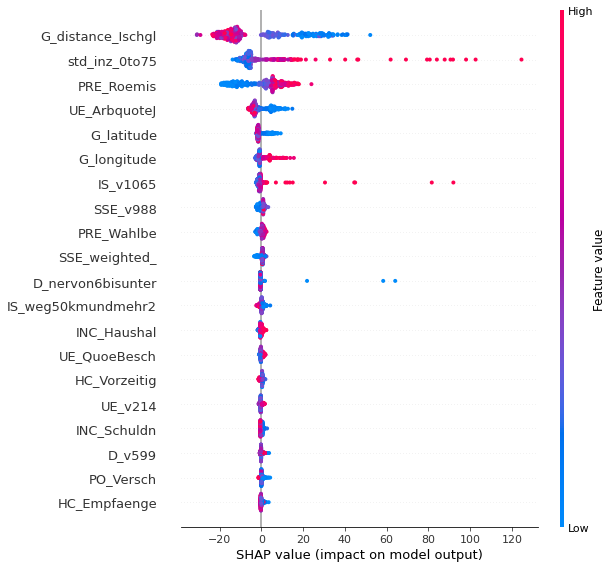

In [11]:
shap.summary_plot(shap_values, X,max_display=20) 

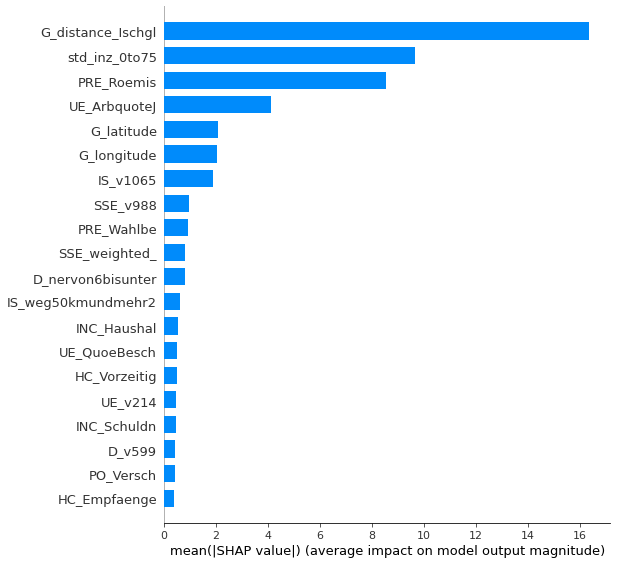

In [12]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=20)

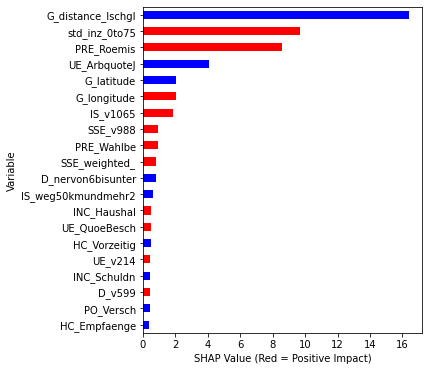

In [13]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X) 

# CatBoost

In [14]:
shap_values_cb = shap.TreeExplainer(cb).shap_values(X)

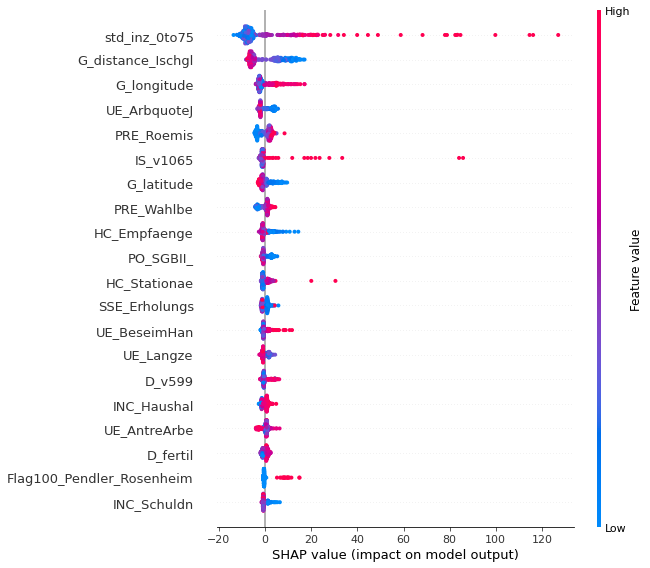

In [15]:
shap.summary_plot(shap_values_cb, X,max_display=20)  #TreeExpliner

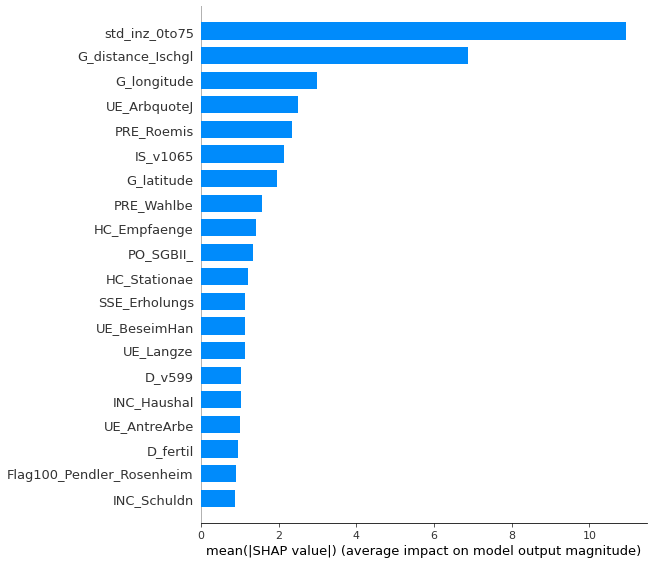

In [16]:
shap.summary_plot(shap_values_cb, X, plot_type="bar",max_display=20)

invalid value encountered in true_divide
invalid value encountered in true_divide


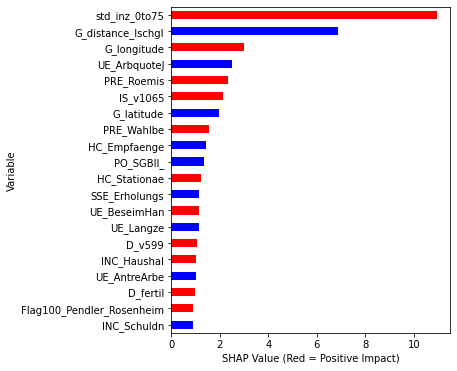

In [17]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    k2 = k2[-20:]
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values_cb,X) 